 # 查看Pipeline支持的任務類型

In [11]:
from transformers.pipelines import SUPPORTED_TASKS
for item in SUPPORTED_TASKS.keys():
  print(item)


audio-classification
automatic-speech-recognition
text-to-audio
feature-extraction
text-classification
token-classification
question-answering
table-question-answering
visual-question-answering
document-question-answering
fill-mask
summarization
translation
text2text-generation
text-generation
zero-shot-classification
zero-shot-image-classification
zero-shot-audio-classification
image-classification
image-feature-extraction
image-segmentation
image-to-text
object-detection
zero-shot-object-detection
depth-estimation
video-classification
mask-generation
image-to-image


In [12]:
# %%
for k, v in SUPPORTED_TASKS.items():
    print(k, v)


audio-classification {'impl': <class 'transformers.pipelines.audio_classification.AudioClassificationPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForAudioClassification'>,), 'default': {'model': {'pt': ('superb/wav2vec2-base-superb-ks', '372e048')}}, 'type': 'audio'}
automatic-speech-recognition {'impl': <class 'transformers.pipelines.automatic_speech_recognition.AutomaticSpeechRecognitionPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForCTC'>, <class 'transformers.models.auto.modeling_auto.AutoModelForSpeechSeq2Seq'>), 'default': {'model': {'pt': ('facebook/wav2vec2-base-960h', '22aad52')}}, 'type': 'multimodal'}
text-to-audio {'impl': <class 'transformers.pipelines.text_to_audio.TextToAudioPipeline'>, 'tf': (), 'pt': (<class 'transformers.models.auto.modeling_auto.AutoModelForTextToWaveform'>, <class 'transformers.models.auto.modeling_auto.AutoModelForTextToSpectrogram'>), 'default': {'model': {'pt': ('suno

 # Pipeline的創建與使用方式

In [13]:
# %%
from transformers import pipeline, QuestionAnsweringPipeline


 ## 根據任務類型直接創建Pipeline, 默認都是英文的模型

In [14]:
# %%
pipe = pipeline("text-classification")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [15]:
# %%
pipe(["very good!", "vary bad!"])


[{'label': 'POSITIVE', 'score': 0.9998525381088257},
 {'label': 'NEGATIVE', 'score': 0.9991207718849182}]

 ## 指定任務類型，再指定模型，創建基於指定模型的Pipeline

In [16]:
import torch
# https://huggingface.co/models 
#https://huggingface.co/uer/roberta-base-finetuned-dianping-chinese
device='cuda:0' if torch.cuda.is_available() else 'cpu'
pipe = pipeline("text-classification", model="uer/roberta-base-finetuned-dianping-chinese",device=device)


In [17]:
# %%
pipe("我覺得不太行！")


[{'label': 'negative (stars 1, 2 and 3)', 'score': 0.9745733737945557}]

 ## 預先加載模型，再創建Pipeline

In [18]:
# %%
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# 這種方式，必須同時指定model和tokenizer
model = AutoModelForSequenceClassification.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
tokenizer = AutoTokenizer.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [19]:
# %%
pipe("我覺得不太行！")


[{'label': 'negative (stars 1, 2 and 3)', 'score': 0.9745733737945557}]

In [20]:
# %%
pipe.model.device


device(type='cpu')

In [21]:
# %%
import torch
torch.cuda.is_available()


True

In [22]:
# %%
import torch
import time
#device='cpu'
times = []
for i in range(100):
    torch.cuda.synchronize() # 有安裝cuda
    
    start = time.time()
    pipe("我覺得不太行！")
    torch.cuda.synchronize() # 有安裝cuda
    end = time.time()
    times.append(end - start)
print(sum(times) / 100)


0.020512199401855467


 ## 使用GPU進行推理

In [23]:
# %%
pipe = pipeline("text-classification", model="uer/roberta-base-finetuned-dianping-chinese", device=0)


In [24]:
# %%
pipe.model.device


device(type='cuda', index=0)

In [25]:
# %%
import torch
import time
times = []
for i in range(100):
    torch.cuda.synchronize()
    
    start = time.time()
    pipe("我覺得不太行！")
    torch.cuda.synchronize()
    end = time.time()
    times.append(end - start)
print(sum(times) / 100)


You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset


0.006128520965576172


 ## 確定Pipeline參數

In [26]:
# %%
qa_pipe = pipeline("question-answering", model="uer/roberta-base-chinese-extractive-qa")


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [27]:
# %%
qa_pipe


In [28]:
# %%
QuestionAnsweringPipeline


transformers.pipelines.question_answering.QuestionAnsweringPipeline

In [29]:
# %%
qa_pipe(question="中國的首都是哪裡？", context="中國的首都是北京", max_answer_len=1)


{'score': 0.0026879077777266502, 'start': 6, 'end': 7, 'answer': '北'}

 # 其他Pipeline示例

In [30]:
# %%
from transformers import pipeline
checkpoint = "google/owlvit-base-patch32"
detector = pipeline(model=checkpoint, task="zero-shot-object-detection")


Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


C:\Users\linchao\AppData\Local\Temp\ipykernel_12184\1540228800.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imread('https://unsplash.com/photos/oj0zeY2Ltk4/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MTR8fHBpY25pY3xlbnwwfHx8fDE2Nzc0OTE1NDk&force=true&w=640')


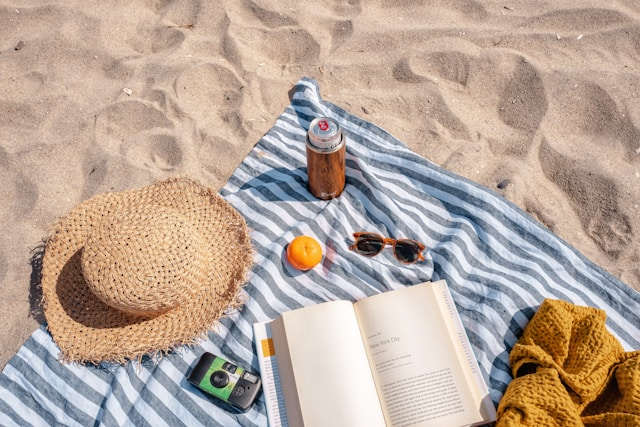

In [31]:
from imageio import imread
from PIL import Image


image = imread('https://unsplash.com/photos/oj0zeY2Ltk4/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MTR8fHBpY25pY3xlbnwwfHx8fDE2Nzc0OTE1NDk&force=true&w=640')
im=Image.fromarray(image)
im

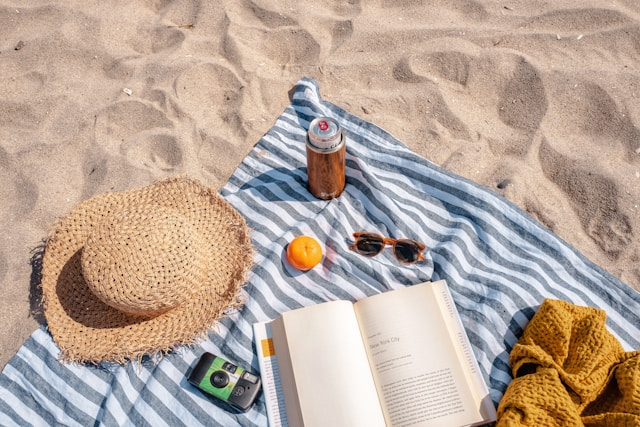

In [32]:
#本地
import shutil
from PIL import Image
import requests

# url = "https://unsplash.com/photos/oj0zeY2Ltk4/download?ixid=MnwxMjA3fDB8MXxzZWFyY2h8MTR8fHBpY25pY3xlbnwwfHx8fDE2Nzc0OTE1NDk&force=true&w=640"
# response = requests.get(url, stream=True)
# with open('img.jpg', 'wb') as out_file:
#     shutil.copyfileobj(response.raw, out_file)
# del response
im = Image.open('img2.jpg')
im

In [33]:
# %%
predictions = detector(
    im,
    candidate_labels=["hat", "sunglasses", "book"],
)
predictions


model.safetensors:   0%|          | 0.00/407M [00:00<?, ?B/s]

[{'score': 0.25893062353134155,
  'label': 'sunglasses',
  'box': {'xmin': 349, 'ymin': 228, 'xmax': 430, 'ymax': 265}},
 {'score': 0.1850169599056244,
  'label': 'book',
  'box': {'xmin': 270, 'ymin': 284, 'xmax': 502, 'ymax': 427}},
 {'score': 0.11234764009714127,
  'label': 'hat',
  'box': {'xmin': 39, 'ymin': 173, 'xmax': 260, 'ymax': 363}}]

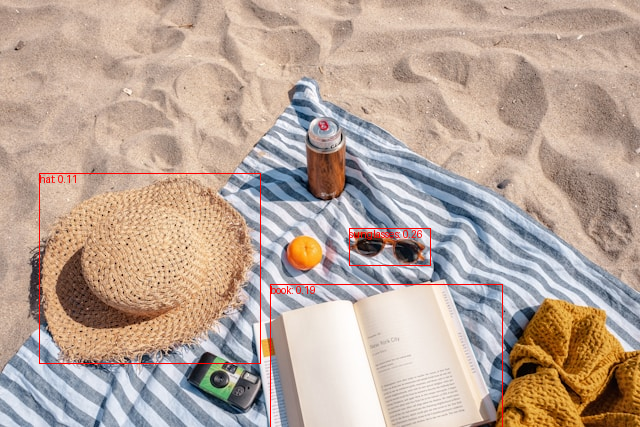

In [34]:
# %%
from PIL import ImageDraw

draw = ImageDraw.Draw(im)

for prediction in predictions:
    box = prediction["box"]
    label = prediction["label"]
    score = prediction["score"]
    xmin, ymin, xmax, ymax = box.values()
    draw.rectangle((xmin, ymin, xmax, ymax), outline="red", width=1)
    draw.text((xmin, ymin), f"{label}: {round(score,2)}", fill="red")

im


 # Pipeline背後的實現

In [35]:
# %%
from transformers import *
import torch


In [36]:
# %%
tokenizer = AutoTokenizer.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")
model = AutoModelForSequenceClassification.from_pretrained("uer/roberta-base-finetuned-dianping-chinese")


loading configuration file config.json from cache at C:\Users\linchao\.cache\huggingface\hub\models--uer--roberta-base-finetuned-dianping-chinese\snapshots\25faf1874b21e76db31ea9c396ccf2a0322e0071\config.json
Model config BertConfig {
  "_name_or_path": "uer/roberta-base-finetuned-dianping-chinese",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "negative (stars 1, 2 and 3)",
    "1": "positive (stars 4 and 5)"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "negative (stars 1, 2 and 3)": 0,
    "positive (stars 4 and 5)": 1
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.46.2",
  "ty

Attempting to create safetensors variant
Attempting to convert .bin model on the fly to safetensors.


In [37]:
# %%
input_text = "我覺得不太行！"
inputs = tokenizer(input_text, return_tensors="pt")
inputs


{'input_ids': tensor([[ 101, 2769, 6221, 2533,  679, 1922, 6121, 8013,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [38]:
# %%
res = model(**inputs)
res


SequenceClassifierOutput(loss=None, logits=tensor([[ 1.7532, -1.8930]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [39]:
# %%
logits = res.logits
logits = torch.softmax(logits, dim=-1)
logits


tensor([[0.9746, 0.0254]], grad_fn=<SoftmaxBackward0>)

In [40]:
# %%
pred = torch.argmax(logits).item()
pred


0

In [41]:
# %%
model.config.id2label


{0: 'negative (stars 1, 2 and 3)', 1: 'positive (stars 4 and 5)'}

In [42]:
# %%
result = model.config.id2label.get(pred)
result


'negative (stars 1, 2 and 3)'